In [16]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from skimage import measure

import numpy as np
from skimage import measure
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os
import numpy as np
import xarray as xr
import sys
from tqdm import tqdm
import multiprocessing as mp
import matplotlib.pyplot as plt




# Ensure pySAMetrics is available in your Python environment
import pySAMetrics
from pySAMetrics.Simulation_2 import Simulation
from pySAMetrics.utils import generate_simulation_paths

from pySAMetrics.Simulation_2 import Simulation

data_dict = {}

for i in range(1, 49):
    data_dict[f'split_{i}'] = {
        'velocity': '8',
        'temperature': '300',
        'bowen_ratio': '1',
        'microphysic': '1',
        'split': str(i)
    }


In [17]:


def load_simulation(simu_parameters, i=1000, path_raw_data='/Volumes/LaCie/000_POSTDOC_2025/long_high_res'):
    """
    Load and run the simulation for the given parameters.

    Parameters:
    - simu_parameters (dict): Dictionary containing simulation parameters.

    Returns:
    - Simulation object or None if failed to load.
    """
    try:
        if i!=1000:
            paths = {
            'path_3d': os.path.join(path_raw_data, f'3D/split_{i+1}.nc'),
            'path_2d': os.path.join(path_raw_data, f'2D/split_{i+1}.nc'),
            'path_1d': os.path.join(path_raw_data, f'1D/split_{i+1}.nc'),
            }

        else:
            paths = generate_simulation_paths(**simu_parameters, folder_path=path_raw_data)
            print(paths)

        simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                          **simu_parameters)
        return simu
    
    except FileNotFoundError as e:
        print(f"Error: {e}. Please check the simulation paths.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}.")
    
    return None

In [18]:
data_dict = {}

for i in range(1, 49):
    data_dict[f'split_{i}'] = {
        'velocity': '8',
        'temperature': '300',
        'bowen_ratio': '1',
        'microphysic': '1',
        'split': str(i)
    }
#list_files = [f'split_{i}' for i in range(4,40)]
list_files = [f'split_{i}' for i in range(4,6)]

mp.set_start_method("spawn", force=True)

for i_file,file in tqdm(enumerate(list_files, start=4)):
    print('Run', file)
    parameters = data_dict[file]

    simu = load_simulation(parameters, i=i_file)
    print(simu.name)

   

0it [00:00, ?it/s]

Run split_4


2it [00:07,  3.91s/it]

RCE_T300_U8_B1_M1_split_4
Run split_5
RCE_T300_U8_B1_M1_split_5


In [19]:
simu.load(backup_folder_path=f'/Volumes/LaCie/000_POSTDOC_2025/long_high_res/saved_simu')


In [20]:
simu.dataset_computed_2d

<xarray.Dataset> Size: 177MB
Dimensions:         (time: 541, y: 128, x: 128)
Dimensions without coordinates: time, y, x
Data variables:
    CR              (time, y, x) float32 35MB ...
    CORE_BINARY     (time, y, x) float32 35MB ...
    ENVELOP_BINARY  (time, y, x) float32 35MB ...
    CP_BINARY       (time, y, x) float32 35MB ...
    CP_LABELS       (time, y, x) float32 35MB ...

In [10]:
print(simu.name)
simu.dataset_computed_2d

RCE_T300_U8_B1_M1_split_5


<xarray.Dataset> Size: 177MB
Dimensions:         (time: 541, y: 128, x: 128)
Dimensions without coordinates: time, y, x
Data variables:
    CR              (time, y, x) float32 35MB ...
    CORE_BINARY     (time, y, x) float32 35MB ...
    ENVELOP_BINARY  (time, y, x) float32 35MB ...
    CP_BINARY       (time, y, x) float32 35MB ...
    CP_LABELS       (time, y, x) float32 35MB ...

In [6]:
from pySAMetrics.ColdPool import ColdPool, extract_cold_pools

In [7]:
label_array = simu.dataset_computed_2d.CP_LABELS.values
qv_array = simu.dataset_3d.QV[:,0].values
cold_pools = extract_cold_pools(label_array, qv_array)


In [8]:
len(cold_pools)

25

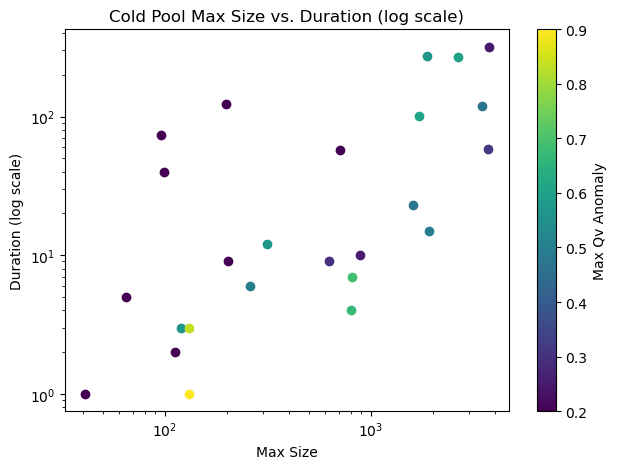

In [9]:
import matplotlib.pyplot as plt

for cp in cold_pools:
    plt.scatter(cp.max_size, cp.duration, c=cp.anomaly_qv, vmin=0.2, vmax=0.9)

plt.xscale('log')  # Set y-axis (duration) to logarithmic scale
plt.yscale('log')  # Set y-axis (duration) to logarithmic scale
plt.xlabel("Max Size")
plt.ylabel("Duration (log scale)")
plt.colorbar(label="Max Qv Anomaly")
plt.title("Cold Pool Max Size vs. Duration (log scale)")
plt.tight_layout()
plt.show()


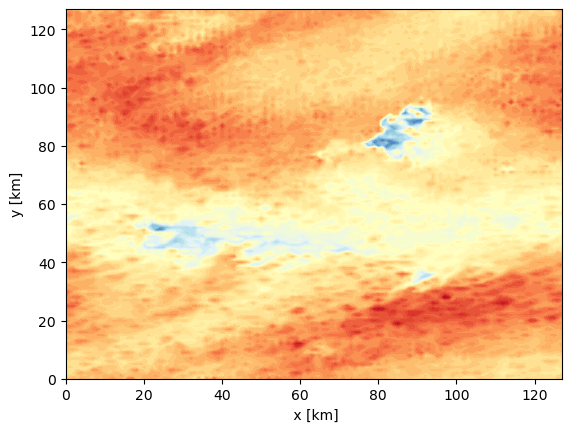

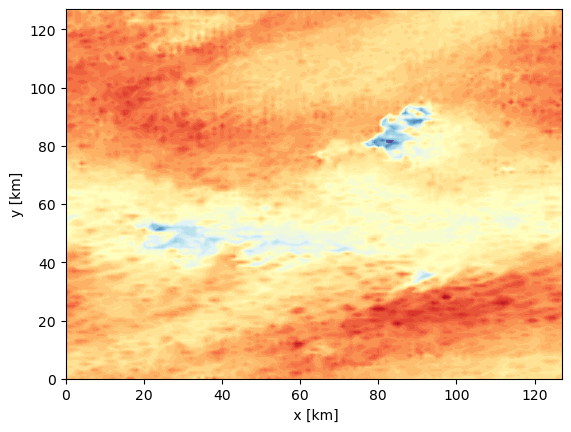

Text(0, 0.5, 'y [km]')

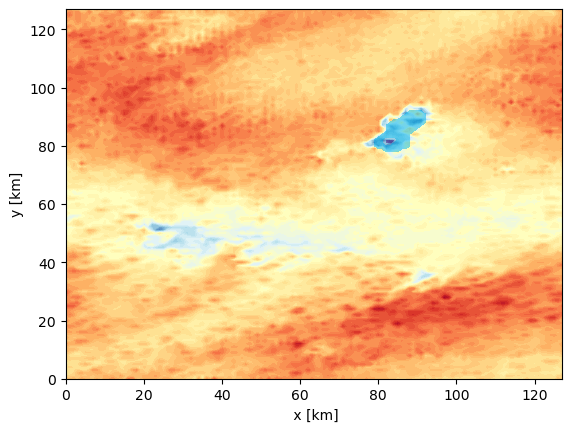

In [10]:
#nt =410 
nt=300
cp_core = simu.dataset_computed_2d.CORE_BINARY[nt].values
cp_core[cp_core==0]=np.nan
cp_env = simu.dataset_computed_2d.ENVELOP_BINARY[nt].values
cp_env[cp_env==0]=np.nan
cp_env = simu.dataset_computed_2d.ENVELOP_BINARY[nt].values
cp_env[cp_env==0]=np.nan

plt.contourf(simu.dataset_computed_3d.BUOYANCY[nt,0], 50, cmap='RdYlBu_r')
plt.xlabel(' x [km]')
plt.ylabel('y [km]')
plt.show()
plt.contourf(simu.dataset_computed_3d.BUOYANCY[nt,0], 50, cmap='RdYlBu_r')
plt.contourf(cp_core, 50, cmap='magma', alpha=0.5 )
plt.xlabel(' x [km]')
plt.ylabel('y [km]')
plt.show()
plt.contourf(simu.dataset_computed_3d.BUOYANCY[nt,0], 50, cmap='RdYlBu_r')
plt.contourf(cp_core, 50, cmap='magma', alpha=0.5)
plt.contourf(cp_env, 50, cmap='rainbow', alpha=0.5)
plt.xlabel(' x [km]')
plt.ylabel('y [km]')



/var/folders/1g/zpcrn7ys4y15p92_t65w5_200000gn/T/ipykernel_78369/3775408029.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


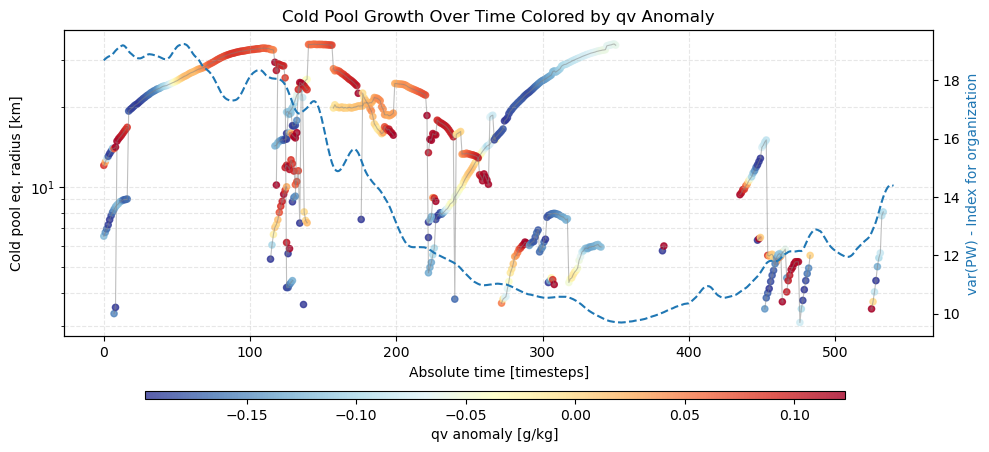

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 4))
ax2 = ax.twinx()  # secondary y-axis

# Add a new axis for the colorbar
cbar_ax = fig.add_axes([0.15, -0.01, 0.7, 0.02])  # Adjust position: [left, bottom, width, height]

for cp in cold_pools:
    birth_time = cp.start_time  # assuming this exists
    time_elapsed = np.arange(len(cp.cluster['sizes']))
    time_absolute = birth_time + time_elapsed

    size = np.sqrt(np.array(cp.cluster['sizes'])/np.pi)
    qv_anom = cp.cluster['qv_anomalies']

    # Line on main axis
    ax.plot(time_absolute, size, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)

    # Scatter with color on main axis
    sc = ax.scatter(time_absolute, size, c=qv_anom, cmap='RdYlBu_r', s=20, alpha=0.8)


ax2.plot(np.var(simu.dataset_2d.PW, axis=(-1, -2)),linestyle='--')#, marker="+")
# Axes labels and formatting
ax.set_yscale('log')  # Only if you want cold pool size in log scale
ax.set_xlabel('Absolute time [timesteps]')
ax.set_ylabel('Cold pool eq. radius [km]', color='black')
ax2.set_ylabel('var(PW) - Index for organization', color='tab:blue')  # This is optional

# Colorbar on the new axis
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar.set_label('qv anomaly [g/kg]')

ax.set_title('Cold Pool Growth Over Time Colored by qv Anomaly')
ax.grid(True, which='both', ls='--', alpha=0.3)
fig.tight_layout()
plt.show()


In [21]:
# --- Load Additional Variables (e.g., Precipitation, W500, etc.) ---

all_var_var = []
all_var_mean = []
variables = ['Prec', 'W500', 'LHF', 'IWP', 'LWNT']
for variable in variables:
    path_var = f'/Volumes/LaCie/000_POSTDOC_2025/long_high_res/var_{variable}.npy'
    path_mean = f'/Volumes/LaCie/000_POSTDOC_2025/long_high_res/mean_{variable}.npy'

    data_evolution_var = np.load(path_var)
    data_evolution_mean = np.load(path_mean)

    all_var_var.append(data_evolution_var)
    all_var_mean.append(data_evolution_mean)

/var/folders/1g/zpcrn7ys4y15p92_t65w5_200000gn/T/ipykernel_74976/3775408029.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


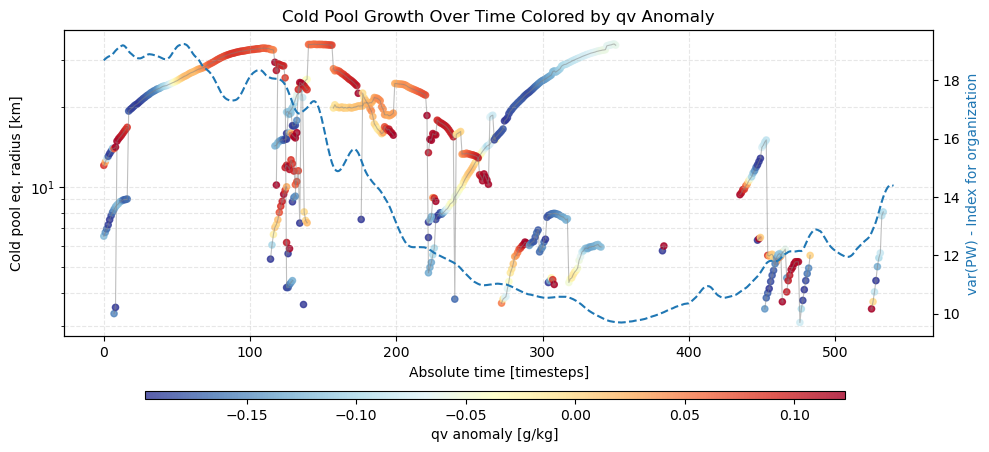

In [22]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 4))
ax2 = ax.twinx()  # secondary y-axis

# Add a new axis for the colorbar
cbar_ax = fig.add_axes([0.15, -0.01, 0.7, 0.02])  # Adjust position: [left, bottom, width, height]

for cp in cold_pools:
    birth_time = cp.start_time  # assuming this exists
    time_elapsed = np.arange(len(cp.cluster['sizes']))
    time_absolute = birth_time + time_elapsed

    size = np.sqrt(np.array(cp.cluster['sizes'])/np.pi)
    qv_anom = cp.cluster['qv_anomalies']

    # Line on main axis
    ax.plot(time_absolute, size, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)

    # Scatter with color on main axis
    sc = ax.scatter(time_absolute, size, c=qv_anom, cmap='RdYlBu_r', s=20, alpha=0.8)


ax2.plot(np.var(simu.dataset_2d.PW, axis=(-1, -2)),linestyle='--')#, marker="+")
# Axes labels and formatting
ax.set_yscale('log')  # Only if you want cold pool size in log scale
ax.set_xlabel('Absolute time [timesteps]')
ax.set_ylabel('Cold pool eq. radius [km]', color='black')
ax2.set_ylabel('var(PW) - Index for organization', color='tab:blue')  # This is optional

# Colorbar on the new axis
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar.set_label('qv anomaly [g/kg]')

ax.set_title('Cold Pool Growth Over Time Colored by qv Anomaly')
ax.grid(True, which='both', ls='--', alpha=0.3)
fig.tight_layout()
plt.show()


In [27]:
import pickle
path_file = '/Users/sophieabramian/Documents/DeepCloudLab/pySAMetrics/src/post_sam_processing/all_cold_pools.pkl'
with open(path_file, "rb") as f:
    all_cold_pools = pickle.load(f)

In [20]:
cp_test = all_cold_pools['RCE_T300_U8_B1_M1_split_4']

In [25]:
list_files = [f'split_{i}' for i in range(4,40)]
list_names = [f'RCE_T300_U8_B1_M1_{split}' for split in list_files]

In [26]:
list_names

['RCE_T300_U8_B1_M1_split_4',
 'RCE_T300_U8_B1_M1_split_5',
 'RCE_T300_U8_B1_M1_split_6',
 'RCE_T300_U8_B1_M1_split_7',
 'RCE_T300_U8_B1_M1_split_8',
 'RCE_T300_U8_B1_M1_split_9',
 'RCE_T300_U8_B1_M1_split_10',
 'RCE_T300_U8_B1_M1_split_11',
 'RCE_T300_U8_B1_M1_split_12',
 'RCE_T300_U8_B1_M1_split_13',
 'RCE_T300_U8_B1_M1_split_14',
 'RCE_T300_U8_B1_M1_split_15',
 'RCE_T300_U8_B1_M1_split_16',
 'RCE_T300_U8_B1_M1_split_17',
 'RCE_T300_U8_B1_M1_split_18',
 'RCE_T300_U8_B1_M1_split_19',
 'RCE_T300_U8_B1_M1_split_20',
 'RCE_T300_U8_B1_M1_split_21',
 'RCE_T300_U8_B1_M1_split_22',
 'RCE_T300_U8_B1_M1_split_23',
 'RCE_T300_U8_B1_M1_split_24',
 'RCE_T300_U8_B1_M1_split_25',
 'RCE_T300_U8_B1_M1_split_26',
 'RCE_T300_U8_B1_M1_split_27',
 'RCE_T300_U8_B1_M1_split_28',
 'RCE_T300_U8_B1_M1_split_29',
 'RCE_T300_U8_B1_M1_split_30',
 'RCE_T300_U8_B1_M1_split_31',
 'RCE_T300_U8_B1_M1_split_32',
 'RCE_T300_U8_B1_M1_split_33',
 'RCE_T300_U8_B1_M1_split_34',
 'RCE_T300_U8_B1_M1_split_35',
 'RCE_T300_U8_

In [52]:

path_pw = '/Volumes/LaCie/000_POSTDOC_2025/long_high_res/var_pw.npy'
data_evolution_pw = np.load(path_pw)

/var/folders/1g/zpcrn7ys4y15p92_t65w5_200000gn/T/ipykernel_98957/4077553873.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


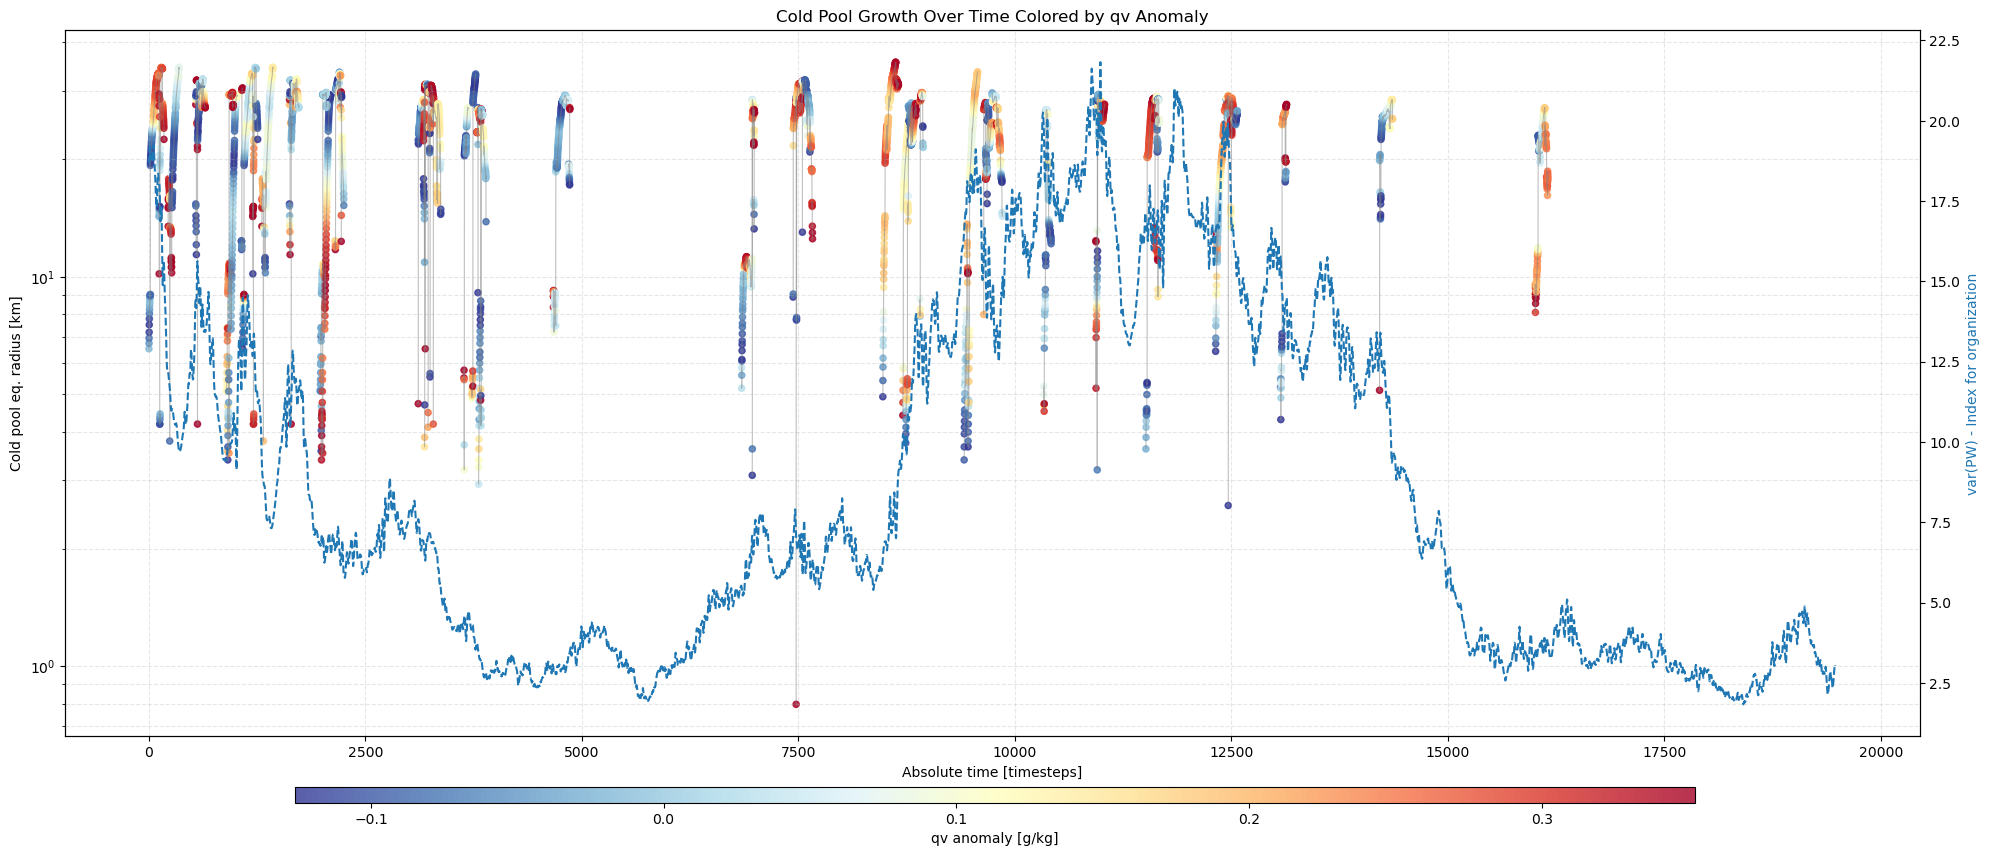

In [76]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20, 8))
ax2 = ax.twinx()  # secondary y-axis

# Add a new axis for the colorbar
cbar_ax = fig.add_axes([0.15, -0.01, 0.7, 0.02])  # Adjust position: [left, bottom, width, height]


count=0
for i_name, name in enumerate(list_names[:30]):
    lag_simu = i_name*541
    for cp in all_cold_pools[name]:
        if  np.sqrt(np.array(cp.max_size))/np.pi>15:
            count +=1
            birth_time = cp.start_time+lag_simu  # assuming this exists
            time_elapsed = np.arange(len(cp.cluster['sizes']))
            time_absolute = birth_time + time_elapsed

            size = np.sqrt(np.array(cp.cluster['sizes'])/np.pi)
            qv_anom = cp.cluster['qv_anomalies']

            # Line on main axis
            ax.plot(time_absolute, size, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)

            # Scatter with color on main axis
            sc = ax.scatter(time_absolute, size, c=qv_anom, cmap='RdYlBu_r', s=20, alpha=0.8)


ax2.plot(data_evolution_pw,linestyle='--')#, marker="+")
# Axes labels and formatting
ax.set_yscale('log')  # Only if you want cold pool size in log scale
ax.set_xlabel('Absolute time [timesteps]')
ax.set_ylabel('Cold pool eq. radius [km]', color='black')
ax2.set_ylabel('var(PW) - Index for organization', color='tab:blue')  # This is optional

# Colorbar on the new axis
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar.set_label('qv anomaly [g/kg]')

ax.set_title('Cold Pool Growth Over Time Colored by qv Anomaly')
ax.grid(True, which='both', ls='--', alpha=0.3)
fig.tight_layout()
plt.show()


In [77]:
print(count)

67


In [63]:
cp.__dict__.keys()

dict_keys(['label_id', 'start_time', 'end_time', 'duration', 'start_size', 'end_size', 'max_size', 'mean_qv', 'mean_domain_qv', 'anomaly_qv', 'max_anomaly_qv', 'cluster'])

/var/folders/1g/zpcrn7ys4y15p92_t65w5_200000gn/T/ipykernel_98957/3753774673.py:37: UserWarning: Adding colorbar to a different Figure <Figure size 2000x800 with 3 Axes> than <Figure size 2000x800 with 3 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
/var/folders/1g/zpcrn7ys4y15p92_t65w5_200000gn/T/ipykernel_98957/3753774673.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


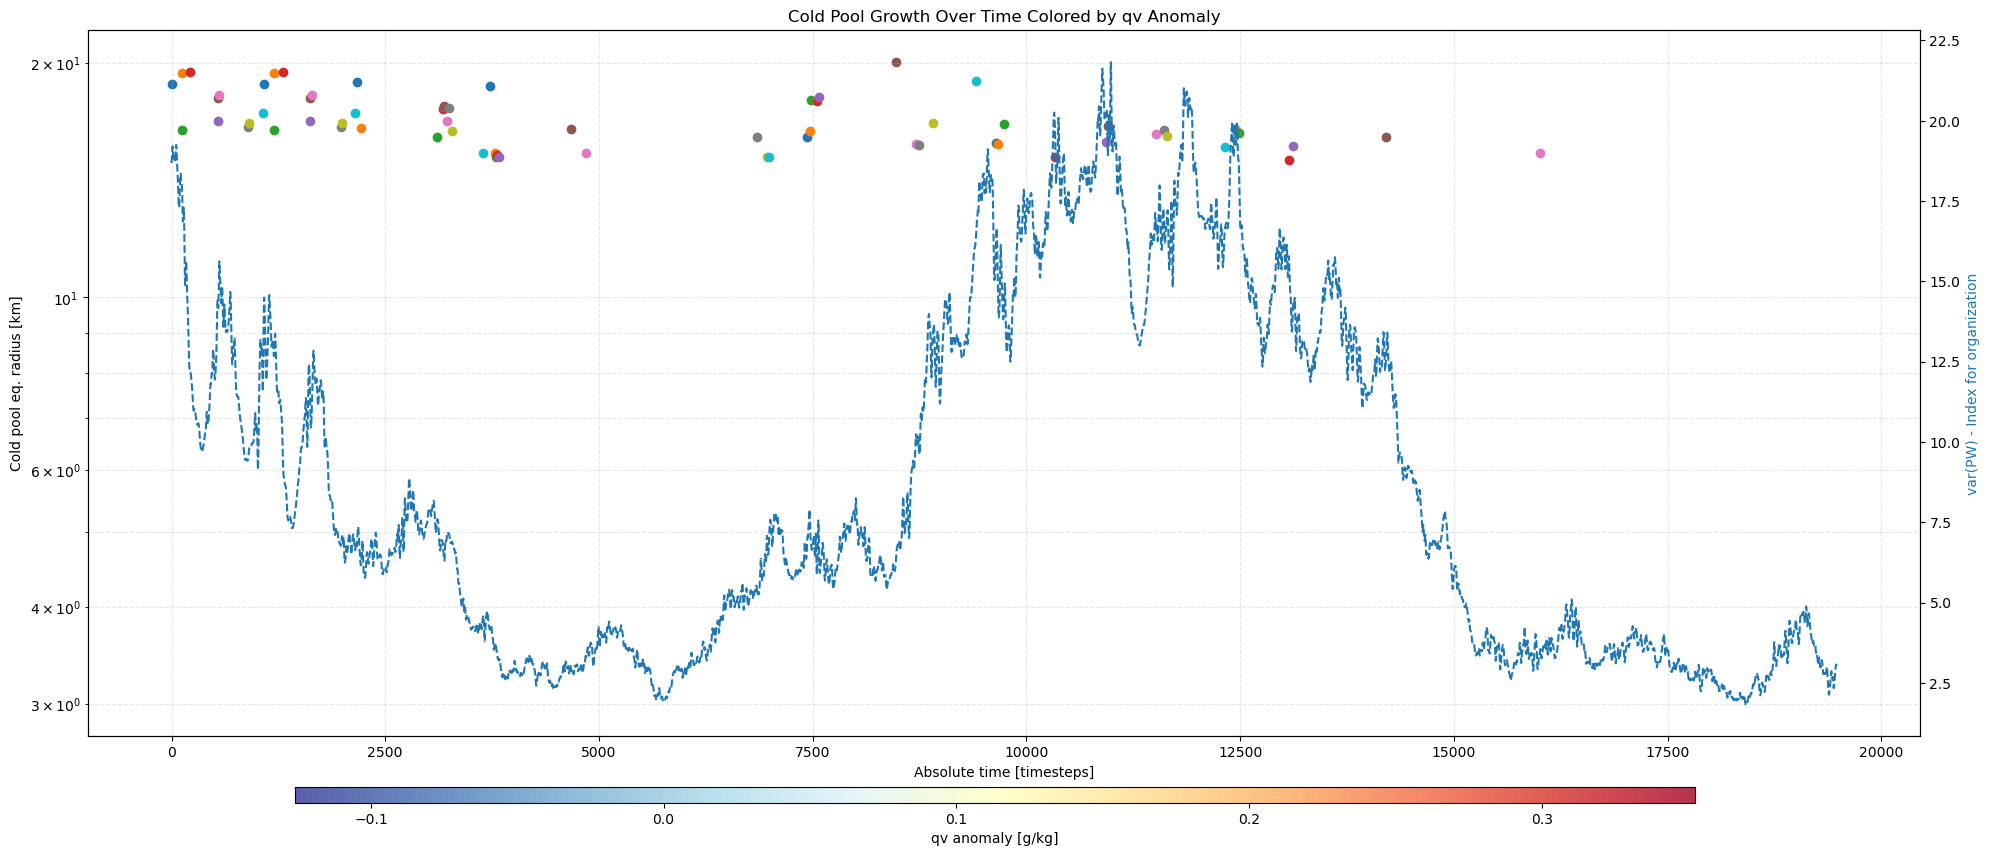

In [62]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20, 8))
ax2 = ax.twinx()  # secondary y-axis

# Add a new axis for the colorbar
cbar_ax = fig.add_axes([0.15, -0.01, 0.7, 0.02])  # Adjust position: [left, bottom, width, height]

for i_name, name in enumerate(list_names[:30]):
    lag_simu = i_name*541
    for cp in all_cold_pools[name]:
        max_radius = np.sqrt(np.array(cp.max_size))/np.pi
        if  max_radius>15:
            birth_time = cp.start_time+lag_simu  # assuming this exists
            #time_elapsed = np.arange(len(cp.cluster['sizes']))
            #time_absolute = birth_time + time_elapsed

            #size = np.sqrt(np.array(cp.cluster['sizes'])/np.pi)
            qv_anom = cp.cluster['qv_anomalies']

            # Line on main axis
            ax.scatter(birth_time, max_radius)

            # Scatter with color on main axis
            #sc = ax.scatter(birth_time, size, c=qv_anom, cmap='RdYlBu_r', s=20, alpha=0.8)

ax.scatter(1, 3, alpha=0)
ax2.plot(data_evolution_pw,linestyle='--')#, marker="+")
# Axes labels and formatting
ax.set_yscale('log')  # Only if you want cold pool size in log scale
ax.set_xlabel('Absolute time [timesteps]')
ax.set_ylabel('Cold pool eq. radius [km]', color='black')
ax2.set_ylabel('var(PW) - Index for organization', color='tab:blue')  # This is optional

# Colorbar on the new axis
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar.set_label('qv anomaly [g/kg]')

ax.set_title('Cold Pool Growth Over Time Colored by qv Anomaly')
ax.grid(True, which='both', ls='--', alpha=0.3)
fig.tight_layout()
plt.show()


/var/folders/1g/zpcrn7ys4y15p92_t65w5_200000gn/T/ipykernel_98957/1462657684.py:37: UserWarning: Adding colorbar to a different Figure <Figure size 2000x800 with 3 Axes> than <Figure size 2000x800 with 3 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
/var/folders/1g/zpcrn7ys4y15p92_t65w5_200000gn/T/ipykernel_98957/1462657684.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


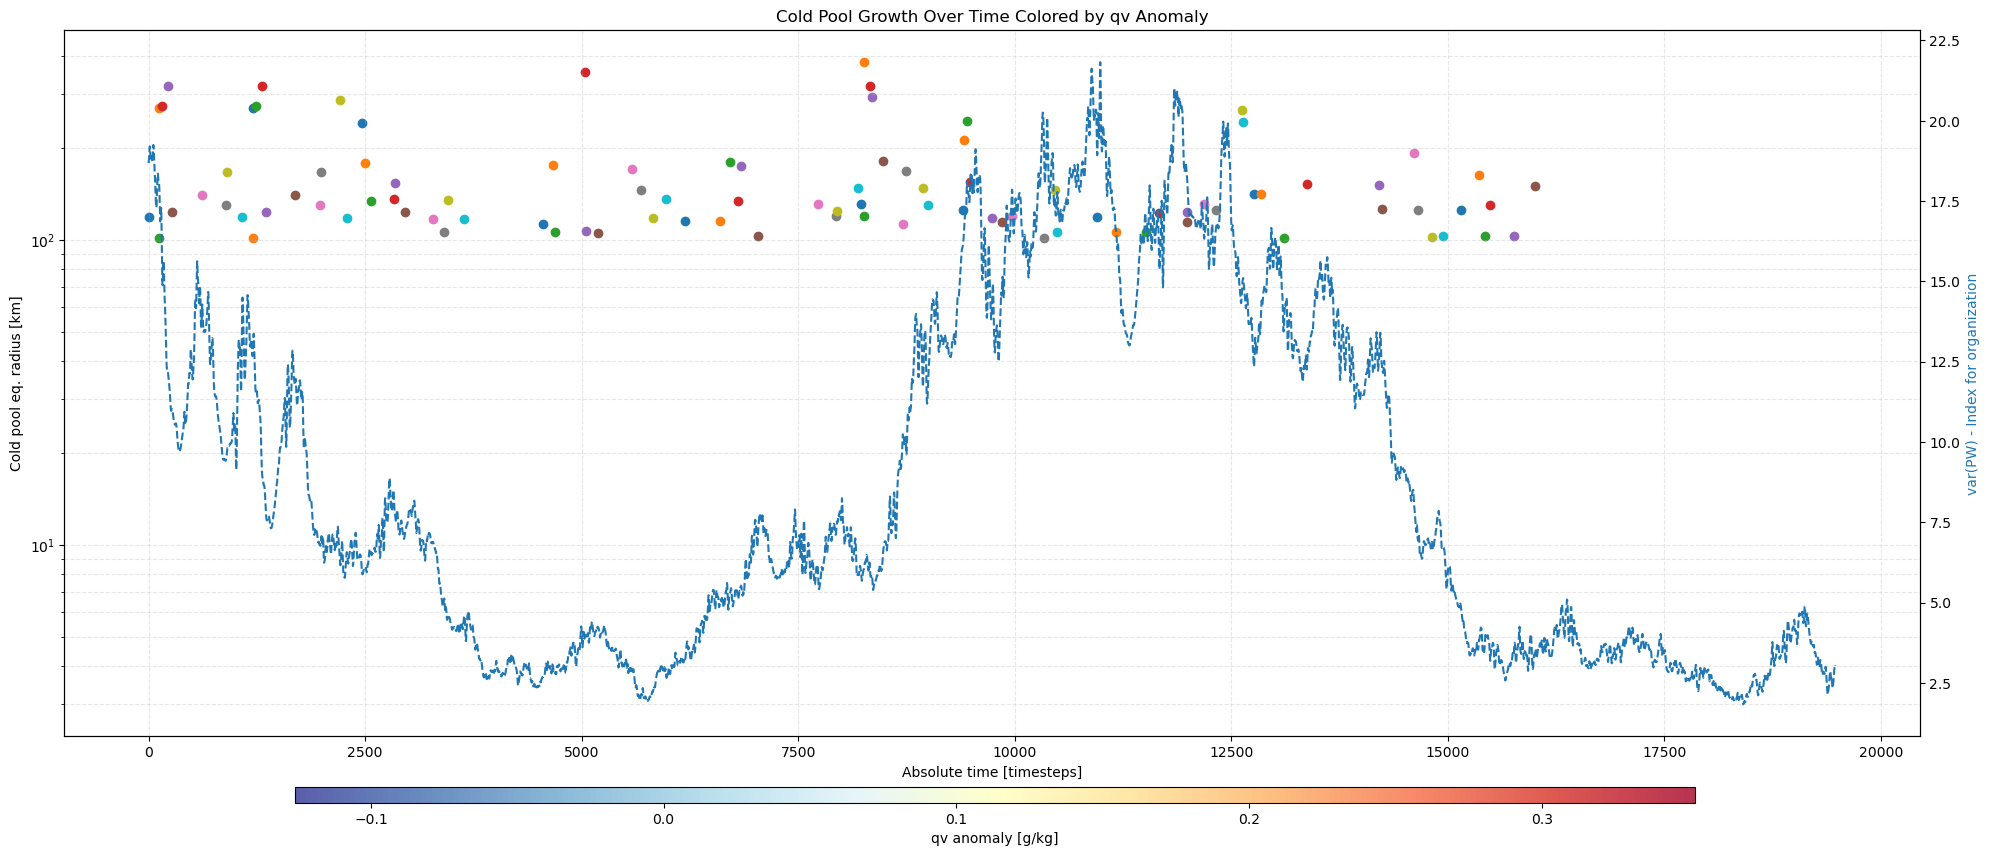

In [75]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20, 8))
ax2 = ax.twinx()  # secondary y-axis

# Add a new axis for the colorbar
cbar_ax = fig.add_axes([0.15, -0.01, 0.7, 0.02])  # Adjust position: [left, bottom, width, height]

for i_name, name in enumerate(list_names[:30]):
    lag_simu = i_name*541
    for cp in all_cold_pools[name]:
        duration = cp.duration
        if  duration>100:
            birth_time = cp.start_time+lag_simu  # assuming this exists
            #time_elapsed = np.arange(len(cp.cluster['sizes']))
            #time_absolute = birth_time + time_elapsed

            #size = np.sqrt(np.array(cp.cluster['sizes'])/np.pi)
            qv_anom = cp.cluster['qv_anomalies']

            # Line on main axis
            ax.scatter(birth_time, duration)

            # Scatter with color on main axis
            #sc = ax.scatter(birth_time, size, c=qv_anom, cmap='RdYlBu_r', s=20, alpha=0.8)

ax.scatter(1, 3, alpha=0)
ax2.plot(data_evolution_pw,linestyle='--')#, marker="+")
# Axes labels and formatting
ax.set_yscale('log')  # Only if you want cold pool size in log scale
ax.set_xlabel('Absolute time [timesteps]')
ax.set_ylabel('Cold pool eq. radius [km]', color='black')
ax2.set_ylabel('var(PW) - Index for organization', color='tab:blue')  # This is optional

# Colorbar on the new axis
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar.set_label('qv anomaly [g/kg]')

ax.set_title('Cold Pool Growth Over Time Colored by qv Anomaly')
ax.grid(True, which='both', ls='--', alpha=0.3)
fig.tight_layout()
plt.show()


In [72]:
len(cp.cluster['sizes']), cp.duration

(11, 11)